In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
cars_dataset=pd.read_csv('cars.csv');

In [65]:
cars_dataset.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [66]:
len(cars_dataset.Car.unique())

17

In [67]:
cars_dataset.shape

(36, 5)

In [68]:
cars_dataset.Model.unique()

array(['Aygo', 'Space Star', 'Citigo', '500', 'Cooper', 'Up!', 'Fabia',
       'A-Class', 'Fiesta', 'A1', 'I20', 'Swift', 'Civic', 'I30', 'Astra',
       '1', '3', 'Rapid', 'Focus', 'Mondeo', 'Insignia', 'C-Class',
       'Octavia', 'S60', 'CLA', 'A4', 'A6', 'V70', '5', 'E-Class', 'XC70',
       'B-Max', '216', 'Zafira', 'SLK'], dtype=object)

In [69]:
len(cars_dataset.Model.unique())

35

In [73]:
x=cars_dataset[['Volume','Weight']]
y=cars_dataset.CO2

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
model=LinearRegression()

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [78]:
model.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred=model.predict(x_test)

In [85]:
y_test

19    105
22     99
28    109
12     99
25    102
26    104
6      90
24     99
29    114
Name: CO2, dtype: int64

In [86]:
score=model.score(x_test,y_test);
score

-0.051580715589922166

In [87]:
model.coef_

array([ 0.01320817, -0.00039211])

In [88]:
from sklearn.metrics import mean_squared_error as mse

In [89]:
mse(y_pred,y_test)

43.93270545131231

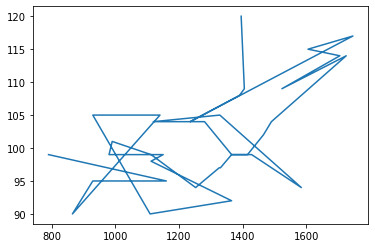

In [37]:
plt.plot(weight,CO2)

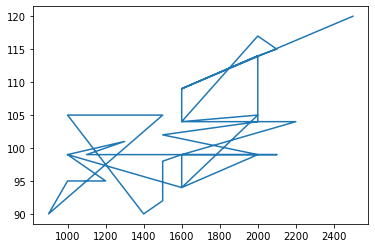

In [38]:
plt.plot(Volume,CO2)

### so we can say that weight and volume are not contributing in release of co2

In [42]:
reduced_dataset=cars_dataset[['Car','Model','CO2']]

In [44]:
reduced_dataset.head()

,Car,Model,CO2
0,Toyoty,Aygo,99
1,Mitsubishi,Space Star,95
2,Skoda,Citigo,95
3,Fiat,500,90
4,Mini,Cooper,105


In [52]:
gk=reduced_dataset.groupby(['Car','Model']);

In [54]:
gk.first()

CO2
Car        Model          
Audi       A1           99
           A4          104
           A6          114
BMW        1            99
           216         108
           5           114
Fiat       500          90
Ford       B-Max       104
           Fiesta       98
           Focus       105
           Mondeo       94
Honda      Civic        94
Hundai     I30          97
Hyundai    I20          99
Mazda      3           104
Mercedes   A-Class      92
           C-Class      99
           CLA         102
           E-Class     115
           SLK         120
Mini       Cooper      105
Mitsubishi Space Star   95
Opel       Astra        97
           Insignia     99
           Zafira      109
Skoda      Citigo       95
           Fabia        90
           Octavia      99
           Rapid       104
Suzuki     Swift       101
Toyoty     Aygo         99
VW         Up!         105
Volvo      S60          99
           V70         109
           XC70        117

In [57]:
gk_car=reduced_dataset.groupby('Car');

In [58]:
gk_car.get_group('Volvo')

,Car,Model,CO2
24,Volvo,S60,99
28,Volvo,V70,109
31,Volvo,XC70,117


In [59]:
reduced_dataset.sort_values(by="CO2")

,Car,Model,CO2
3,Fiat,500,90
6,Skoda,Fabia,90
7,Mercedes,A-Class,92
20,Ford,Mondeo,94
13,Honda,Civic,94
1,Mitsubishi,Space Star,95
2,Skoda,Citigo,95
15,Opel,Astra,97
14,Hundai,I30,97
8,Ford,Fiesta,98


### so more CO2 gas is released by Mercedes(SLK) and less gas is released by Fiat(500)

### standardisisng the data

In [90]:
from sklearn import preprocessing
weights_volumes=preprocessing.scale(x);

In [92]:
co2=preprocessing.scale(y)

In [93]:
x_train,x_test,y_train,y_test=train_test_split(weights_volumes,co2,test_size=0.25)

In [94]:
model.fit(x_train,y_train)

LinearRegression()

In [95]:
model.predict(x_test)

array([ 0.95638264, -1.03492222,  0.04534629, -0.22624071, -0.06230139,
        0.12445481, -0.06351748,  0.74366196,  0.71261938])

In [96]:
y_test

array([ 0.26831836, -0.41192538, -0.41192538,  0.40436711, -0.41192538,
        0.9485621 , -0.00377913,  0.26831836, -0.41192538])

In [97]:
model.score(x_test,y_test)

-1.0023382533929213